In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os

In [9]:
dim = (800,600)

img1 = cv2.imread('../Figures/MV2LossAcc_NoEdge_NoAugment.png')
img2 = cv2.imread('../Figures/MV2ROC_NoEdge_NoAugment.png')
img3 = cv2.imread('../Figures/MV2CM_NoEdge_NoAugment.png')
images = [img1, img2, img3]
new_images = [cv2.resize(i, dim, interpolation = cv2.INTER_CUBIC) for i in images]
cv2.imwrite('../Figures/MV2All_NoEdge_NoAugment.png', np.hstack(new_images))    
cv2.imshow('Test', np.hstack(new_images))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
dim = (400,400)
test_folder = '../Figures/ModelComparisons/VGG16'
images = []
for i in os.listdir(test_folder):
    if i == 'ipynb_checkpoints': 
        continue
    img_path = f'{test_folder}/{i}'
    img = cv2.imread(img_path)
    img = cv2.resize(img, dim, interpolation = cv2.INTER_CUBIC)
    images.append(img)
    
cv2.imwrite('../Figures/VGG16.png', np.hstack(images))    
cv2.imshow('Test', np.hstack(images))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [9]:
dim = (224,224)
test_folder = '../Tests/Photos'
images = []
for i in os.listdir(test_folder):
    if i == 'ipynb_checkpoints': 
        continue
    img_path = f'{test_folder}/{i}'
    img = cv2.imread(img_path)
    img = cv2.resize(img, dim, interpolation = cv2.INTER_CUBIC)
    images.append(img)
cv2.imshow('Test', np.hstack(images))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
def get_image_value(path, dim, edge = False, img_type = 'normal'): 
    if edge: 
        img = cv2.imread(path)
        clone = img.copy() 
        clone = cv2.resize(clone, dim, interpolation = cv2.INTER_CUBIC)
        clone = cv2.cvtColor(clone, cv2.COLOR_BGR2GRAY)

        blurred = cv2.GaussianBlur(img, (3,3), 0)
        wide = cv2.Canny(blurred, 10,200)
        tight = cv2.Canny(blurred, 225, 250)
        wide = cv2.resize(wide, dim, interpolation = cv2.INTER_CUBIC)
        tight = cv2.resize(tight, dim, interpolation = cv2.INTER_CUBIC)
        print(clone.shape, wide.shape)
        return np.hstack([clone, tight, wide])
    else: 
        img = image.load_img(path, target_size = dim)
        img = image.img_to_array(img)
        
        if img_type =='grey':
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = img.reshape(img.shape[0], img.shape[1], 1)
            return img
        else: 
            return img/255

test = get_image_value('../Separated/FinalImages/Pistol/7.png', var.norm_dimension, img_type = 'mobilenet', edge = True)
cv2.imshow('test', test)
cv2.waitKey(0)
cv2.destroyAllWindows()

(150, 150) (150, 150)


In [2]:
img1 = cv2.imread('../Separated/Pistol/armas (2933).jpg')
img2 =cv2.imread('../Separated/FinalImages/Pistol/7.png') 
img1 = cv2.resize(img1, (96,96), interpolation = cv2.INTER_CUBIC)
#     wide = cv2.resize(wide, dim, interpolation = cv2.INTER_CUBIC)

print(img1.shape, img2.shape)
cv2.imshow('Test', np.hstack([img1, img2]))
cv2.waitKey(0)
cv2.destoryAllWindows()

(96, 96, 3) (96, 96, 3)


AttributeError: module 'cv2.cv2' has no attribute 'destoryAllWindows'

In [7]:
#graph of each countries death rate per 100,000 people
df = pd.read_csv('../MassShootings.csv')
df = df.sort_values(by = 'deathRate', ascending  = False)
df = df.head(20)
df
# plt.style.use('dark_background')
# fig, ax = plt.subplots(figsize = (10,5))
# ax.set_title('Firearm Death Rate per 1mil ')
# rects = ax.barh(df.country, df.totalNumber)
# ax.set_xlabel('Death Rate Per 1mil')
# plt.tight_layout()
# plt.savefig('figures/MassShootings.png')

,country,deathRate,pop2020
0,norway,1.888,5421.241
1,serbia,0.381,8737.371
2,france,0.347,65273.511
3,macedonia,0.337,2083.374
4,albania,0.206,2877.797
5,slovakia,0.185,5459.642
6,switzerland,0.142,8654.622
7,finland,0.132,5540.720
8,belgium,0.128,11589.623
9,czech republic,0.123,10708.981


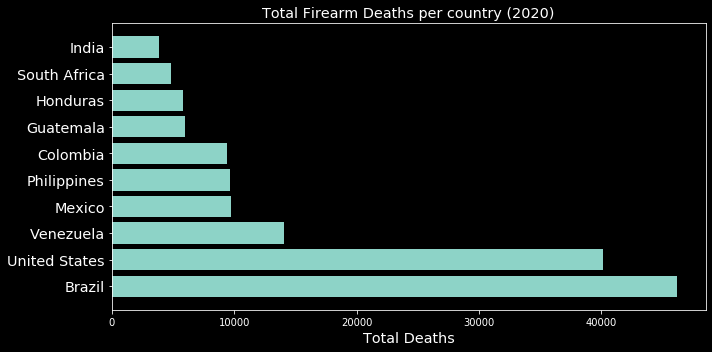

In [15]:
#graph of each countries death rate per 100,000 people
df = pd.read_csv('../../Firearmdeaths.csv')
df = df.sort_values(by = 'totalNumber', ascending  = False)
df = df.head(10)

plt.style.use('dark_background')
fig, ax = plt.subplots(figsize = (10,5))
ax.set_title('Total Firearm Deaths per country (2020)', fontsize = 'x-large')
rects = ax.barh(df.country, df.totalNumber)
ax.set_xlabel('Total Deaths', fontsize = 'x-large')
ax.set_yticklabels(df.country, fontsize = 'x-large')
plt.tight_layout()
plt.savefig('../Figures/FirearmDeaths.png')

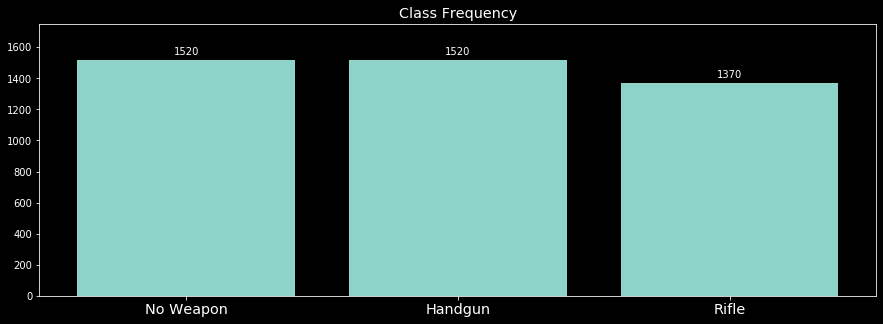

In [17]:
plt.style.use('dark_background')

def autolabel(rects, ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
fig, ax = plt.subplots(1,figsize = (15, 5))
rects1 = ax.bar(['No Weapon', 'Handgun', 'Rifle'], [1520, 1520, 1370])
ax.set_title('Class Frequency', fontsize = 'x-large') 
ax.set_ylim(top = 1750)
ax.set_xticklabels(['No Weapon', 'Handgun', 'Rifle'], fontsize = 'x-large')

# rects2 = ax[1].bar(['No Weapon', 'Handgun', 'Rifle'], [243, 294, 137])
# ax[1].set_title('Test Set')

autolabel(rects1, ax)
# autolabel(rects2, ax[1])

plt.savefig('../Figures/ClassFreq.png')

In [8]:

##SLIDING WINDOW VIZ 
import time
def sliding_window(image, step_size, windowsize): 
    for y in range(0, image.shape[0], step_size):
        for x in range(0, image.shape[1], step_size):
#             cv2.rectangle(image, (x, y), (x + windowsize[0], y + windowsize[1]), (255,0,0), 2)
#     cv2.imshow('test', image)
#     cv2.waitKey(0)
    
            yield (x,y,image[y:y + windowsize[1], x:x + windowsize[0]])

    
    
    
df = pd.read_csv('../../Separated/PATHS.csv')
img = cv2.imread('../../Combined/Pistol_1097_18.jpg')
clone = img.copy()
df = df[df.filename == 'Pistol_1097_18.jpg']
origstartx = df.xmin.values[0]
origstarty = df.ymin.values[0] 
origendx = df.xmax.values[0] 
origendy  = df.ymax.values[0]

# cv2.rectangle(clone, (origstartx, origstarty), (origendx, origendy), (0,0,255), 2) 
cv2.imshow('Test', clone)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:

##SLIDING WINDOW VIZ 
import time
def sliding_window(image, step_size, windowsize): 
    for y in range(0, image.shape[0], step_size):
        for x in range(0, image.shape[1], step_size):
#             cv2.rectangle(image, (x, y), (x + windowsize[0], y + windowsize[1]), (255,0,0), 2)
#     cv2.imshow('test', image)
#     cv2.waitKey(0)
    
            yield (x,y,image[y:y + windowsize[1], x:x + windowsize[0]])

    
    
    
df = pd.read_csv('../Separated/PATHS.csv')
img = cv2.imread('Pistol_1097_18.jpg')
df = df[df.filename == 'Pistol_1097_18.jpg']
origstartx = df.xmin.values[0]
origstarty = df.ymin.values[0] 
origendx = df.xmax.values[0] 
origendy  = df.ymax.values[0]

cv2.rectangle(img, (origstartx, origstarty), (origendx, origendy), (0,0,255), 2) 
# sliding_window(img, step_size = 30, windowsize = (30,30))

# windowsize = (80,80)
# for x, y, window in sliding_window(img, step_size = 30, windowsize = windowsize): 
#     clone = img.copy()
#     cv2.rectangle(clone, (x,y), (x+ windowsize[0], y + windowsize[1]), (255, 0, 0), 2)
#     cv2.imshow('Window', clone)
#     cv2.waitKey(0)
#     time.sleep(.025)
# cv2.destroyAllWindows()   


In [33]:
def get_iou(box1, box2):
    # determine the (x, y)-coordinates of the intersection rectangle
    xa = max(box1[0], box2[0])
    ya = max(box1[1], box2[1])
    xb = min(box1[2], box2[2])
    yb = min(box1[3], box2[3])
    # compute the area of intersection rectangle
    interArea = max(0, xb - xa + 1) * max(0, yb - ya + 1)
    
    # compute the area of both the prediction and ground-truth
    # rectangles
    boxAArea = (box1[2] - box1[0] + 1) * (box1[3] - box1[1] + 1)
    boxBArea = (box2[2] - box2[0] + 1) * (box2[3] - box2[1] + 1)
    
    iou = interArea / float(boxAArea + boxBArea - interArea)
    # return the intersection over union value
    return iou


df = pd.read_csv('../../Separated/PATHS.csv')
img = cv2.imread('../../Combined/Pistol_1097_18.jpg')
clone = img.copy()
df = df[df.filename == 'Pistol_1097_18.jpg']
origstartx = df.xmin.values[0]
origstarty = df.ymin.values[0] 
origendx = df.xmax.values[0] 
origendy  = df.ymax.values[0]

roi = []
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
ss.setBaseImage(img)
ss.switchToSelectiveSearchFast()
rects = ss.process() 
prop_rect = [] 
input_dim = (50,50)

       
gt_box = ((origstartx, origstarty, origendx, origendy))
gt_startx, gt_starty, gt_endx, gt_endy = gt_box
for (x,y,w,h) in rects: 
    prop_rect.append((x,y,x+w, y+h))
positive = 0 
negative = 0 
rois = [] 
for rect in prop_rect[:1000]: 
    startx, starty, endx, endy = rect
    iou = get_iou(gt_box, rect)
    #if intersection is greater than .7 --> positive
    if iou > .7 and positive ==0: 
        roi = img[starty:endy, startx:endx]
        positive += 1
        roi = cv2.resize(roi, input_dim, interpolation = cv2.INTER_CUBIC)
        rois.append(roi)
          
    if  iou == 0 and negative == 0: 
        roi = img[starty:endy, startx: endx]
        negative += 1
        roi = cv2.resize(roi, input_dim, interpolation = cv2.INTER_CUBIC)
        
   

In [29]:

cv2.imshow('Test', rois[0])
cv2.waitKey(0)
cv2.destroyAllWindows()

In [34]:
def get_image_value(img, dim, edge = False, img_type = 'normal'): 
    if edge: 
        clone = img.copy() 
        clone = cv2.resize(clone, dim, interpolation = cv2.INTER_CUBIC)
        clone = cv2.cvtColor(clone, cv2.COLOR_BGR2GRAY)

        blurred = cv2.GaussianBlur(img, (3,3), 0)
        wide = cv2.Canny(blurred, 10,200)
        tight = cv2.Canny(blurred, 225, 250)
        wide = cv2.resize(wide, dim, interpolation = cv2.INTER_CUBIC)
        tight = cv2.resize(tight, dim, interpolation = cv2.INTER_CUBIC)
        print(clone.shape, wide.shape)
        return np.hstack([clone, tight, wide])
    else: 
        img = image.load_img(path, target_size = dim)
        img = image.img_to_array(img)
        
        if img_type =='grey':
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = img.reshape(img.shape[0], img.shape[1], 1)
            return img
        else: 
            return img/255

test = get_image_value(rois[0], (50,50), img_type = 'mobilenet', edge = True)
cv2.imshow('test', test)
cv2.waitKey(0)
cv2.destroyAllWindows()

(50, 50) (50, 50)


In [38]:
img = '../../Separated/Pistol/armas (2933).jpg'

df = pd.read_csv('../../Separated/PATHS.csv')
img = cv2.imread(img)
df = df[df.filename == 'armas (2933).jpg']
origstartx = df.xmin.values[0]
origstarty = df.ymin.values[0] 
origendx = df.xmax.values[0] 
origendy  = df.ymax.values[0]
cv2.rectangle(img, (origstartx, origstarty), (origendx, origendy), (0,0,255), 2) 
img = cv2.resize(img, (150,150), interpolation = cv2.INTER_CUBIC)
cv2.imshow('test', img)
cv2.waitKey(0)
cv2.destroyAllWindows()